# Titanic: Machine Learning from Disaster

## 1. Import libraries

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the data

In [2]:
df_titanic = pd.read_csv('train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-Female,Sex-Male,Embarked-C,Embarked-Q,Embarked-S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Preprocessing data

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3> Drop PassengerId, Name, Ticket, and Cabin </h3>

In [6]:
df_titanic = df_titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

In [7]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


 <h3>Replace NaN In Embarked</h3>

In [8]:
modus_embarked = df_titanic['Embarked'].value_counts().idxmax()
df_titanic['Embarked'].replace(np.nan, modus_embarked, inplace=True)

In [9]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [10]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<h3>Make Dummy Variabel for Sex

In [11]:
dummy_variable_1 = pd.get_dummies(df_titanic['Sex'])
dummy_variable_1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [12]:
dummy_variable_1.rename(columns={'female':'Sex-Female', 'male':'Sex-Male'}, inplace=True)

In [13]:
df_titanic = pd.concat([df_titanic, dummy_variable_1], axis=1)

<h3> Drop Attribute Sex

In [14]:
df_titanic = df_titanic.drop(columns = ['Sex'])

In [15]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex-Female,Sex-Male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


<h3>Make Dummy Variabel for Embarked

In [16]:
dummy_variable_2 = pd.get_dummies(df_titanic['Embarked'])
dummy_variable_2

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [17]:
dummy_variable_2.rename(columns={'C':'Embarked-C', 'Q':'Embarked-Q','S':'Embarked-S'}, inplace=True)

In [18]:
df_titanic = pd.concat([df_titanic, dummy_variable_2], axis=1)

<h3> Drop Attribute Embarked

In [20]:
df_titanic = df_titanic.drop(columns = ['Embarked'])

In [21]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-Female,Sex-Male,Embarked-C,Embarked-Q,Embarked-S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<h3> Drop Nan In Age

In [27]:
df_titanic2 = df_titanic.loc[~df_titanic['Age'].isnull()]

In [28]:
df_titanic2.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex-Female    0
Sex-Male      0
Embarked-C    0
Embarked-Q    0
Embarked-S    0
dtype: int64

In [39]:
def pair_plot(df, col):
    pp = sns.pairplot(data=df,
                 palette='colorblind',
                 y_vars=['Age'],
                 x_vars=[col],
                 )
    pp.fig.set_size_inches(15,10)
    plt.show()

Pair Plot of Survived with target


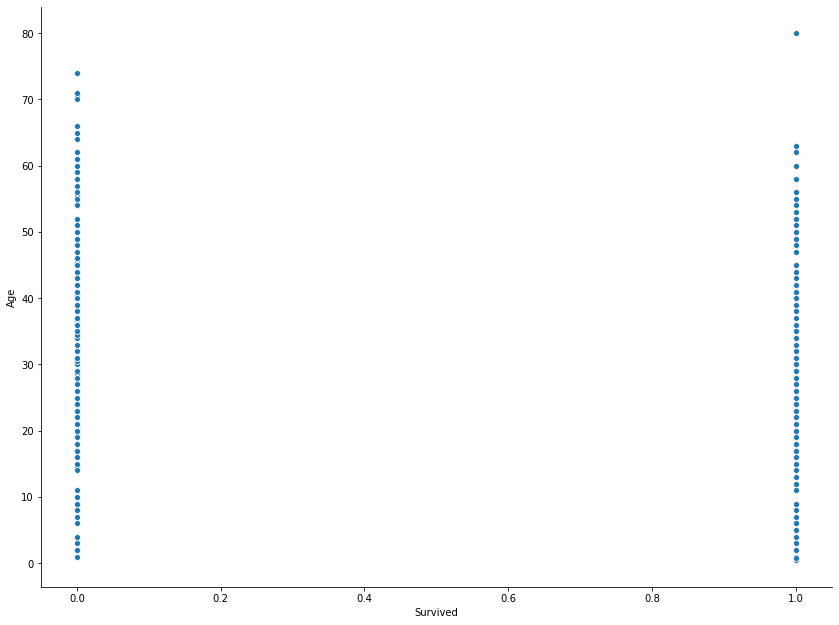

Pair Plot of Pclass with target


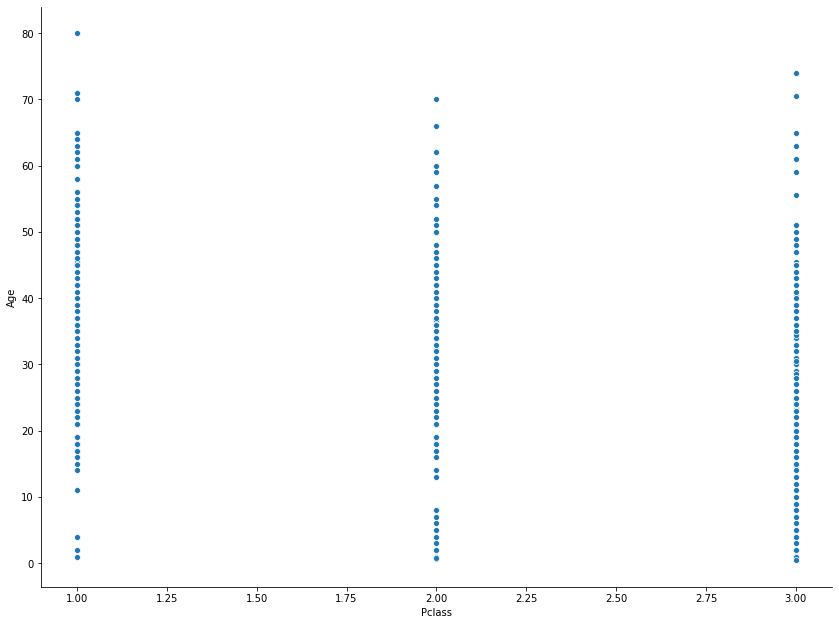

Pair Plot of SibSp with target


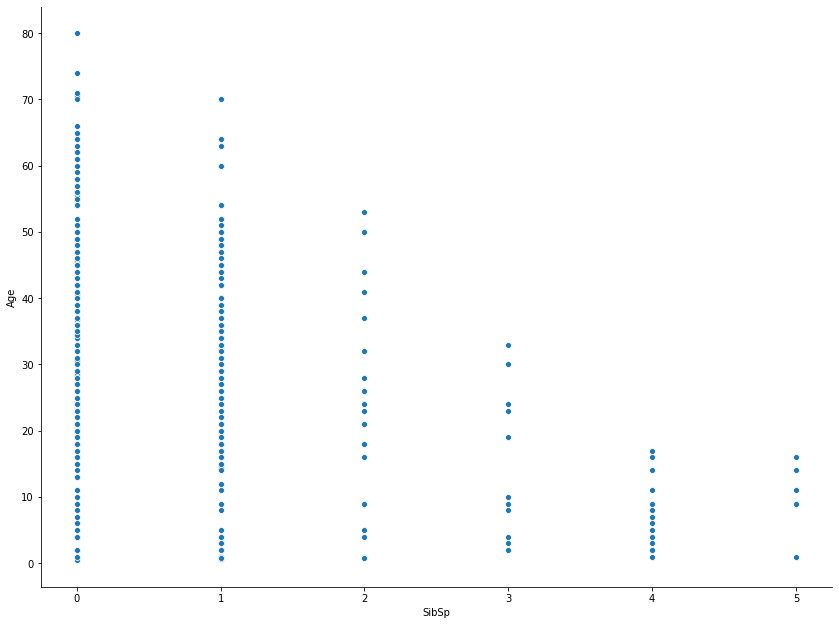

Pair Plot of Parch with target


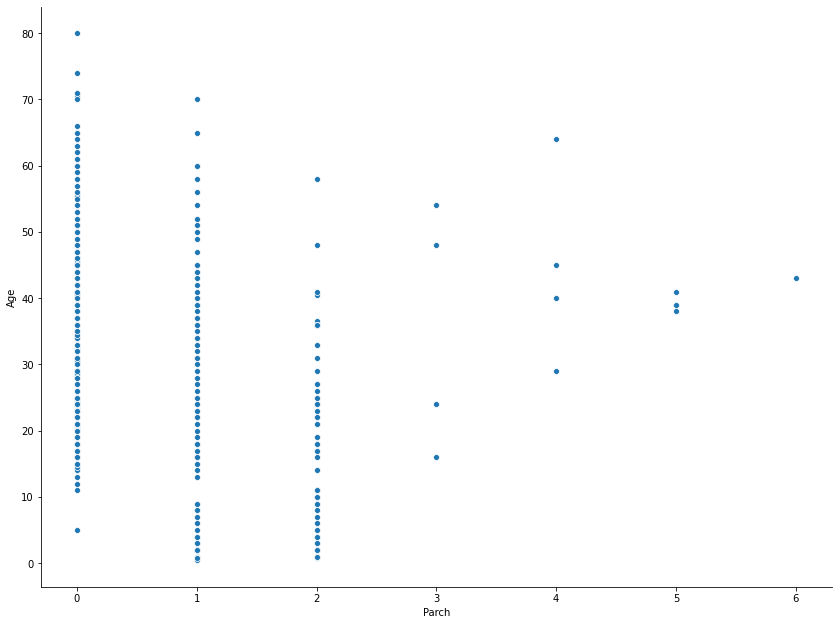

Pair Plot of Fare with target


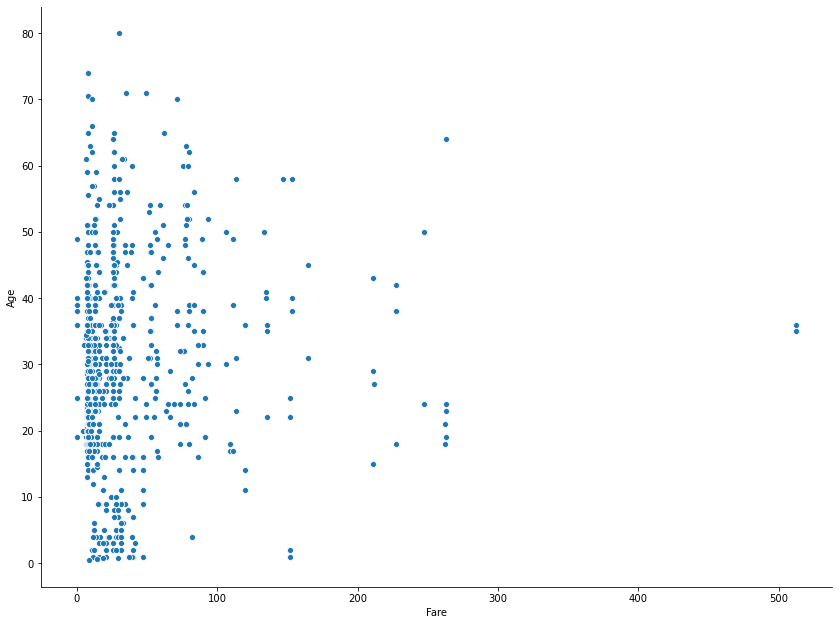

Pair Plot of Sex-female with target


KeyError: "['Sex-female'] not in index"

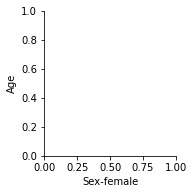

In [40]:
target_cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex-female', 
               'Sex-male', 'Embarked-C', 'Embarked-Q', 'Embarked-S']
for c in target_cols:
    print('Pair Plot of {} with target'.format(c))
    pair_plot(df_titanic2, c)
    print('='*110)

In [42]:
df_titanic2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt
                                                                         .get_cmap('coolwarm'), axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-Female,Sex-Male,Embarked-C,Embarked-Q,Embarked-S
Survived,1.0,-0.36,-0.077,-0.017,0.093,0.27,0.54,-0.54,0.19,-0.05,-0.16
Pclass,-0.36,1.0,-0.37,0.067,0.026,-0.55,-0.16,0.16,-0.28,0.13,0.19
Age,-0.077,-0.37,1.0,-0.31,-0.19,0.096,-0.093,0.093,0.036,-0.022,-0.023
SibSp,-0.017,0.067,-0.31,1.0,0.38,0.14,0.1,-0.1,-0.045,0.052,0.018
Parch,0.093,0.026,-0.19,0.38,1.0,0.21,0.25,-0.25,-0.0088,-0.0091,0.012
Fare,0.27,-0.55,0.096,0.14,0.21,1.0,0.18,-0.18,0.3,-0.063,-0.25
Sex-Female,0.54,-0.16,-0.093,0.1,0.25,0.18,1.0,-1.0,0.1,0.026,-0.11
Sex-Male,-0.54,0.16,0.093,-0.1,-0.25,-0.18,-1.0,1.0,-0.1,-0.026,0.11
Embarked-C,0.19,-0.28,0.036,-0.045,-0.0088,0.3,0.1,-0.1,1.0,-0.095,-0.89
Embarked-Q,-0.05,0.13,-0.022,0.052,-0.0091,-0.063,0.026,-0.026,-0.095,1.0,-0.38


## 4. Regression Modelling

In [34]:
features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex-Female',
            'Sex-Male', 'Embarked-C', 'Embarked-Q', 'Embarked-S']
X = df_titanic2[features]
y = df_titanic2['Age']

In [35]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     33.36
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.14e-44
Time:                        09:38:38   Log-Likelihood:                -2808.7
No. Observations:                 714   AIC:                             5635.
Df Residuals:                     705   BIC:                             5676.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5617      1.211     24.416      0.0